In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')
sns.set()

In [52]:
df = pd.read_csv('messages.csv')

In [53]:
df.head()

,date,message
0,2023-04-10 13:23:41+00:00,2 room Flat for rent. Isani\n\nАдрес: navtlug...
1,2023-04-10 13:13:51+00:00,3 room Flat for rent. Didi digomi\n\nАдрес: i...
2,2023-04-10 13:13:01+00:00,3 room Flat for rent. Nutsubidze plateau\n\nА...
3,2023-04-10 13:11:49+00:00,3 room Flat for rent. Saburtalo\n\nАдрес: del...
4,2023-04-10 13:08:58+00:00,3 room Flat for rent. Nutsubidze plateau\n\nА...


In [54]:
print(df['message'][0])

2 room Flat for rent.  Isani

Адрес: navtlugi st. 10,

Дата: 10.04.2023 17:15
Этаж: 20
Площадь: 60 м²
Комнат: 2
Спален: 1
Комментарий: კომპლექსი არქი ისანი
--------
Комплекс Архи Исани

Цена: 600$

Связь: WhatsApp (за неделю номер упоминался 13 раз, возможно это риелтор)
@georgia_aparts_bot - здесь есть фильтр Только собственники

На карте: maps.google.com
URL: ss.ge


In [64]:
floor_regex = r'Этаж: (\d+)'
area_regex = r'Площадь: (\d+) м²'
rooms_regex = r'Комнат: (\d+)'
bedrooms_regex = r'Спален: (\d+)'
district_regex = r'rent\. (.*)'
price_regex = r'Цена: (\d+)\$'

In [65]:
df['district'] = df['message'].str.extract(district_regex)
df['area'] = df['message'].str.extract(area_regex)
df['floor'] = df['message'].str.extract(floor_regex)
df['rooms'] = df['message'].str.extract(rooms_regex)
df['bedrooms'] = df['message'].str.extract(bedrooms_regex)
df['price'] = df['message'].str.extract(price_regex)

In [85]:
df.dropna(inplace=True)

In [66]:
df['district'] = df['district'].str.strip()
df['area'] = df['area'].str.strip().astype(float)
df['floor'] = df['floor'].str.strip().astype(int)
df['rooms'] = df['rooms'].str.strip().astype(int)
df['bedrooms'] = df['bedrooms'].str.strip().astype(int)
df['price'] = df['price'].str.strip().astype(int)

In [67]:
df

,date,message,district,area,floor,rooms,bedrooms,price
0,2023-04-10 13:23:41+00:00,2 room Flat for rent. Isani\n\nАдрес: navtlug...,Isani,60.0,20.0,2.0,1.0,600.0
1,2023-04-10 13:13:51+00:00,3 room Flat for rent. Didi digomi\n\nАдрес: i...,Didi digomi,70.0,2.0,3.0,1.0,550.0
2,2023-04-10 13:13:01+00:00,3 room Flat for rent. Nutsubidze plateau\n\nА...,Nutsubidze plateau,53.0,4.0,3.0,2.0,600.0
3,2023-04-10 13:11:49+00:00,3 room Flat for rent. Saburtalo\n\nАдрес: del...,Saburtalo,71.0,2.0,3.0,2.0,790.0
4,2023-04-10 13:08:58+00:00,3 room Flat for rent. Nutsubidze plateau\n\nА...,Nutsubidze plateau,80.0,16.0,3.0,2.0,600.0
...,...,...,...,...,...,...,...,...
50527,2022-03-28 14:46:22+00:00,Newly finished apartment for rent\n\nАдрес: Di...,NaN,46.0,8.0,2.0,0.0,400.0
50528,2022-03-28 14:45:26+00:00,Newly finished apartment for rent\n\nАдрес: Ja...,NaN,60.0,5.0,2.0,1.0,500.0
50529,2022-03-28 14:45:13+00:00,Newly finished apartment for rent\n\nАдрес: Mu...,NaN,40.0,7.0,2.0,1.0,600.0
50530,2022-03-28 14:44:21+00:00,Newly finished apartment for rent\n\nАдрес: Sa...,NaN,60.0,2.0,2.0,1.0,350.0


In [83]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40115 entries, 0 to 50483
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      40115 non-null  object 
 1   message   40115 non-null  object 
 2   district  40115 non-null  object 
 3   area      40115 non-null  float64
 4   floor     40115 non-null  float64
 5   rooms     40115 non-null  float64
 6   bedrooms  40115 non-null  float64
 7   price     40115 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.8+ MB


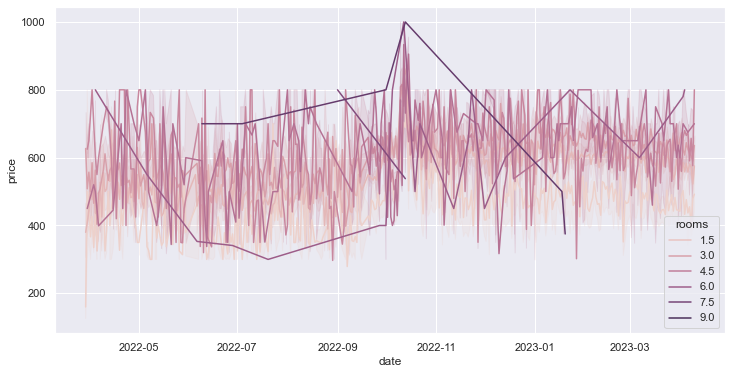

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='date', y='price', hue='rooms');

In [92]:
df['district'].unique()

array(['Isani', 'Didi digomi', 'Nutsubidze plateau', 'Saburtalo',
       'Samgori', 'Digomi 1 - 9', 'Mukhiani', 'Didube', 'Mtatsminda',
       'Chugureti', 'Varketili', 'Gldani', 'Temqa',
       'Districts of Vazha-Pshavela', 'Sololaki', 'Digomi',
       'Mesame masivi', 'Lisi lake', 'Vashlijvari', 'Ortachala',
       'Avchala', 'Sanzona', 'Nadzaladevi', 'Vake', 'Avlabari', 'Bagebi',
       'Navtlugi', 'Vazisubani', 'Vera', 'Vedzisi', 'Elia',
       'Digomi village', 'Koniaki village', 'Zahesi',
       'One bedroom with spacious living room. 80m2. Second floor. New building.',
       'The apartment has all necessary appliances and furniture.',
       'Kukia',
       'In a newly built building. With three rooms, two bedrooms, furniture and full equipment. 2 minutes&#39; walk from the Varketili metro station. I am the owner! The price is $650',
       'Airport village', 'Ponichala', 'Abanotubani', 'Afrika',
       'I am the owner.', 'Tbilisi sea',
       'with all necessary appliances an